## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





[0.5, 0.5660377358490566, 0.5676328502415459, 0.5762987012987013, 0.5550122249388753, 0.5470588235294118, 0.5360065466448445, 0.5316011235955056, 0.528290282902829, 0.5268052516411379, 0.5226600985221674, 0.5228494623655914, 0.5152013147082991, 0.5104364326375711, 0.5058160028198802, 0.506087528792366, 0.5060166615242209, 0.5065349985477781, 0.502880658436214, 0.5014296854691968, 0.5045690293899728, 0.5048223947306516, 0.504603637996856, 0.5048335123523093, 0.5025736051060326, 0.5029655990510083, 0.5009505703422054, 0.5005492493592091, 0.5015889830508474, 0.50272758267985, 0.500659195781147, 0.5001594896331738, 0.49907292954264526, 0.4982019778243932, 0.49825479930191974, 0.49759819157954227, 0.4978021978021978, 0.4982624966586474, 0.497201613952883, 0.4972733037412809, 0.4967231358971188, 0.49439015562794064, 0.4951124720292074, 0.4953410790291039, 0.4963462619449129, 0.496427393646257, 0.4954296160877514, 0.49584254289022206, 0.4958260331856127, 0.49651691065118625, 0.496536710864832

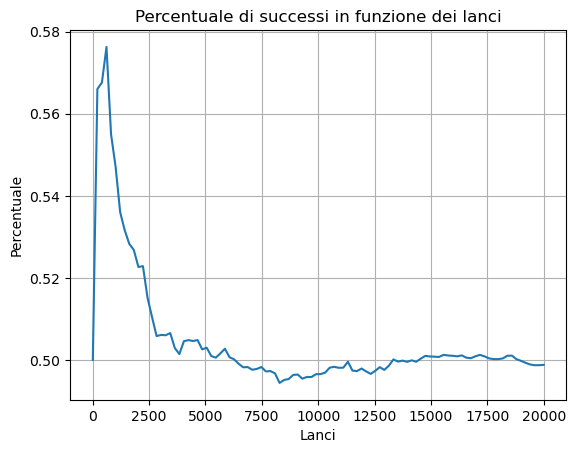

In [56]:
import random
import time
import numpy as np



dim=100
tot = [0] * dim
lanci = [0] * dim
#print(tot)


start_time = time.time()

N=20000
for i in range(0, N):
    a=random.randint(0, 1)
    for j in range(0, dim):
        if j+1>(i+(19990/99-10))/(19990/99):
            lanci[j] += 1
            tot[j] += a
#print(tot)
#print(lanci)
percentuale = []
for i in range(0, dim):
    percentuale.append(tot[i]/lanci[i])
print(percentuale)


end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")



start_time = time.time()


def teste(n):
    l = np.array(np.random.randint(0, 2, n))
    freq = np.sum(l) / n
    return freq*100

numeri=np.arange(10, 20000, 100)
percentuali = [teste(i) for i in numeri]
print(percentuali)


end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#plot con sulla x lanci e sulla y percentuale
import matplotlib.pyplot as plt
plt.plot(lanci, percentuale)
plt.xlabel('Lanci')
plt.ylabel('Percentuale')
plt.title('Percentuale di successi in funzione dei lanci')
plt.grid()
plt.show()

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [57]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df.shape

(714, 12)

In [74]:
df.shape[0]-df.isnull().sum(axis=0)

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Cabin          185
Embarked       714
dtype: int64

In [70]:
moda = df['Embarked'].mode()
df["Embarked"] = df["Embarked"].fillna(moda[0])

In [73]:
df = df.dropna(subset= "Age")
df.shape

(714, 12)

In [76]:
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

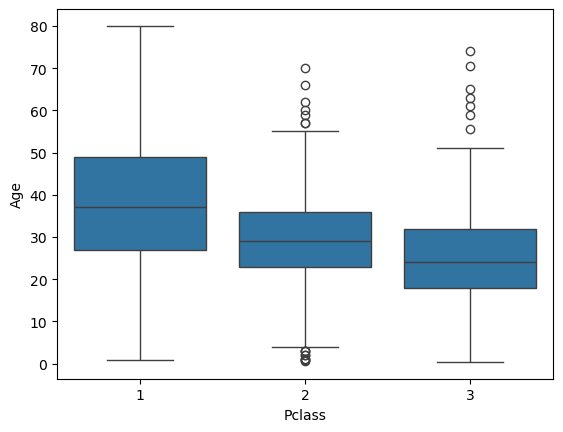

In [82]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

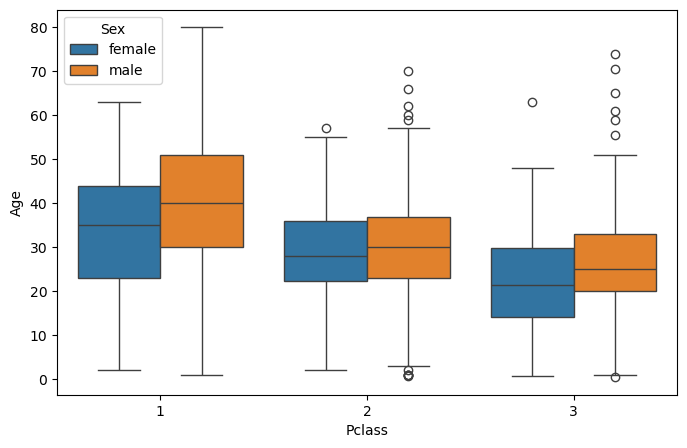

In [83]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df) 
plt.show()

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()